
# Handwritten equation solver using CNN 

Mathematical equation solver using character and symbol recognition using image processing and CNN.

###  ***Author: Raymond Apenteng***

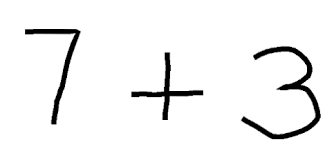

### Importing Libraries

In [79]:
import cv2
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import model_from_json

### Downloading and Preparing the Dataset

Ensure you have the dataset downloaded and extracted. The folder should contain subfolders for each digit and symbol.

***Dataset link :*** https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols/data

### Feature Extraction

We'll use OpenCV for image processing and contour extraction.

In [80]:
def process_image(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

The `process_image` function reads an image, inverts it, converts it to binary, finds the largest contour, extracts the bounding rectangle, resizes it to 28x28, and flattens it into a 784-element array.

In [81]:
data=[]

In [82]:
data=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\-")
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])    
print(len(data))

data0=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\0")
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

data1=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\1")
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

data2=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\2")
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

data3=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\3")
for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

data4=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\4")
for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

data5=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\5")
for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

data6=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\6")
for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

data7=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\7")
for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

data8=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\8")
for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

data9=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\9")
for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

data11=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\+")
for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

data12=process_image(r"C:\Users\rayap\Documents\Python Scripts\LGMVIP-DataScience\Task 3\es\data\times")
for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

33997
40911
67431
93572
104481
111877
115422
118540
121449
124517
128254
153366
156617


- The script loops through each symbol directory, processes each image, and appends the features and labels to the data list.

In [ ]:
# Convert the data to a DataFrame
df = pd.DataFrame(data, index=None)

# Save the data to a CSV file
df.to_csv('dataset.csv', index=False)

- The list `data` is converted to a dataframe 
- DataFrame is saved as a CSV file with the appropriate column names.

### Loading the  CSV Dataset

In [67]:
df = pd.read_csv('dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10


In [68]:
df.shape

(156617, 785)

### Preprocessing and Reshaping Data

The dataset is split into features and labels, reshaped to 28x28 for each image, normalized, and labels are converted to categorical data.

In [69]:
# Assign labels to y_train and drop the labels column from X_train
labels = np.array(df[['784']])
features = df.iloc[:, :784]
print(features.head())

# Number of samples
num_samples = features.shape[0]

# Reshape the dataset to (num_samples, 28, 28, 1)
X_train = features.to_numpy().reshape(num_samples, 28, 28, 1)

# Normalize the data
X_train = X_train / 255.0

# Convert labels to categorical
y_train = to_categorical(labels, num_classes=13)

print("Data preprocessing completed.")

     0    1    2    3    4    5    6    7    8    9  ...  774  775  776  777  \
0  255  255  255  255  255  255  255  255  255  255  ...    0    0    0    0   
1  255  255  255  255  255  255  255  255  255  255  ...    0    0    0    0   
2  255  255  255  255  255  255  255  255  255  255  ...    0    0    0    0   
3  255  255  255  255  255  255  255  255  255  255  ...    0    0    0    0   
4  255  255  255  255  255  255  255  255  255  255  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]
Data preprocessing completed.


In [47]:
X_train.shape

(156617, 28, 28, 1)

### Building the Convolutional Neural Network

A CNN model is built using Keras, with layers including Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.

In [70]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\rayap\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 15)          │           4,335 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 540)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          69,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 13)                  │             663 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,016 (316.47 KB)

 Trainable params: 81,016 (316.47 KB)

 Non-trainable params: 0 (0.00 B)

######## Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))  # 10 digits + 3 symbols

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("CNN model built successfully.")

### Training the Model

The model is trained on the preprocessed dataset.

In [72]:
model.fit(X_train, y_train, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8322 - loss: 0.6015
Epoch 2/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9793 - loss: 0.0765
Epoch 3/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9877 - loss: 0.0455
Epoch 4/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9919 - loss: 0.0300
Epoch 5/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9939 - loss: 0.0223
Epoch 6/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9944 - loss: 0.0195
Epoch 7/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9953 - loss: 0.0166
Epoch 8/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9961 - loss: 0.0127
Epoch 9/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9965 - loss: 0.0114
Epoch 10/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9971 - loss: 0.0103


In [144]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, shuffle=True)

print("Model training completed.")

Epoch 1/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8258 - loss: 0.6338 - val_accuracy: 0.0626 - val_loss: 14.1551
Epoch 2/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9812 - loss: 0.0688 - val_accuracy: 0.0723 - val_loss: 15.8709
Epoch 3/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9890 - loss: 0.0410 - val_accuracy: 0.0861 - val_loss: 16.6101
Epoch 4/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9925 - loss: 0.0278 - val_accuracy: 0.0883 - val_loss: 18.2000
Epoch 5/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9941 - loss: 0.0203 - val_accuracy: 0.0885 - val_loss: 18.2537
Epoch 6/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9955 - loss: 0.0163 - val_accuracy: 0.0887 - val_loss: 22.0476
Epoch 7/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9957 - loss: 0.0147 - val_accuracy: 0.0913 - val_loss: 21.8719
Epoch 8/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9966 - loss: 0.

### Saving the Model

The trained model is saved to a JSON file and its weights are saved separately.

In [73]:
# Save the model
model_json = model.to_json()
with open("cnn_model1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("cnn_model1.weights.h5")

print("Model saved to disk.")

Model saved to disk.


In [77]:
# Save the model
model_json = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("cnn_model.weights.h5")

print("Model saved to disk.")

Model saved to disk.


### Loading the Model and Predicting

The model is loaded from the saved files, and a function is provided to preprocess images, predict the equation, and solve it using the eval function.

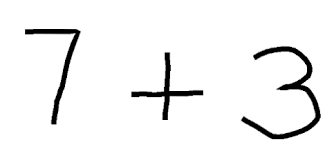

In [78]:
# Load the model
json_file = open('cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cnn_model.weights.h5")

# Preprocess the input image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = ~img
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    ctrs, ret = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

    symbols = []
    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        im_crop = thresh[y:y+h+10, x:x+w+10]
        im_resize = cv2.resize(im_crop, (28, 28))
        im_resize = np.reshape(im_resize, (1, 28, 28, 1))
        im_resize = im_resize / 255.0
        symbols.append(im_resize)
    
    return symbols

# Load and preprocess the image
image_path = 'had written.png'
symbols = preprocess_image(image_path)

# Predict the symbols using the loaded model
symbol_labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
                 10: '-', 11: '+', 12: '*'}

predicted_symbols = []
for symbol in symbols:
    prediction = loaded_model.predict(symbol)
    predicted_label = np.argmax(prediction)
    predicted_symbols.append(symbol_labels[predicted_label])

# Combine the predicted symbols to form the equation
equation = ''.join(predicted_symbols)
print(f"Predicted Equation: {equation}")

# Evaluate the equation
try:
    result = eval(equation)
    print(f"Result: {result}")
except Exception as e:
    print(f"Error evaluating the equation: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Equation: 7+3
Result: 10
